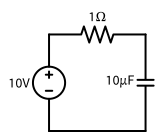

In [12]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.SourceV().up().label('10V')
    d += elm.Resistor().right().label('1Ω')
    d += elm.Capacitor().down().label('10μF')
    d += elm.Line().left()

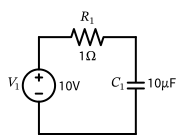

In [13]:
with schemdraw.Drawing() as d:
    d += elm.SourceV(d="up", toplabel="$V_1$", botlabel="10V")
    d += elm.Resistor(d="right", toplabel="$R_1$", botlabel="1Ω")
    d += elm.Capacitor(d="down", toplabel="$C_1$" , botlabel="10μF")
    d += elm.Line().left()
    